# 高斯噪音（Gaussian Noise）

文字的描述比较枯燥，我这里就直接贴一张图来说明什么叫高斯噪音

首先从一维来介绍，假设某一种有效信号它表示为$\mu$，而随着时间的延续，比方说这个信号是来自某种温度传感器，由于传感器老化或者传输信号出现了某种干扰，这些干扰的信号范围在$[-3\sigma, 3\sigma]$之间，然后我们把这段时间内噪音的振幅收集并且整理后，发现它符合正态分布曲线，亦或者称为高斯曲线，那么这样的噪音就称为高斯噪音。


$$
f(x) = \frac{1}{ \sqrt {2 \pi } \sigma } e^(- \frac{(x- \mu )^2}{2 \sigma^2} )
$$

这个公式简单的说一下：
* 曲线关于$x = \mu$ 对称，通常这个值对应的是**信号本号**
* $x = \mu$ 处为正态分布的最大值，振幅为 $\frac{1}{ \sqrt {2 \pi } \sigma }$，也就是信号本号自身的强度，亦或者说是**期望值**
* 而$\sigma$所决定的，就是噪音信号的分布情况，数学上称这玩意为**标准差**
* 当标准差越小，信号噪音就越集中在期望值附近，换句话说也就是信号受噪音影响程度越小，而标准差越大，信号就越模糊。

所以，如果将信号挪到了0上，而噪音分布的标准差为1的时候，这个就是小学二年级所说的标准正态分布了。

In [1]:
import numpy as np

# 高斯噪音生成函数
def add_gaussian_noise(image, mean=0, sigma=25, ratio=0.5):
    noisy_image = image.copy()
    noise = np.random.normal(mean, sigma, image.shape)  # 生成高斯分布的噪声
    mask = np.random.rand(*image.shape) < ratio  # 根据比例生成掩膜
    noisy_image[mask] = np.clip(image[mask] + noise[mask], 0, 255)  # 应用噪声并裁剪到0-255
    return noisy_image.astype(np.uint8)

接下来我们尝试把高斯噪音加入到图片中。

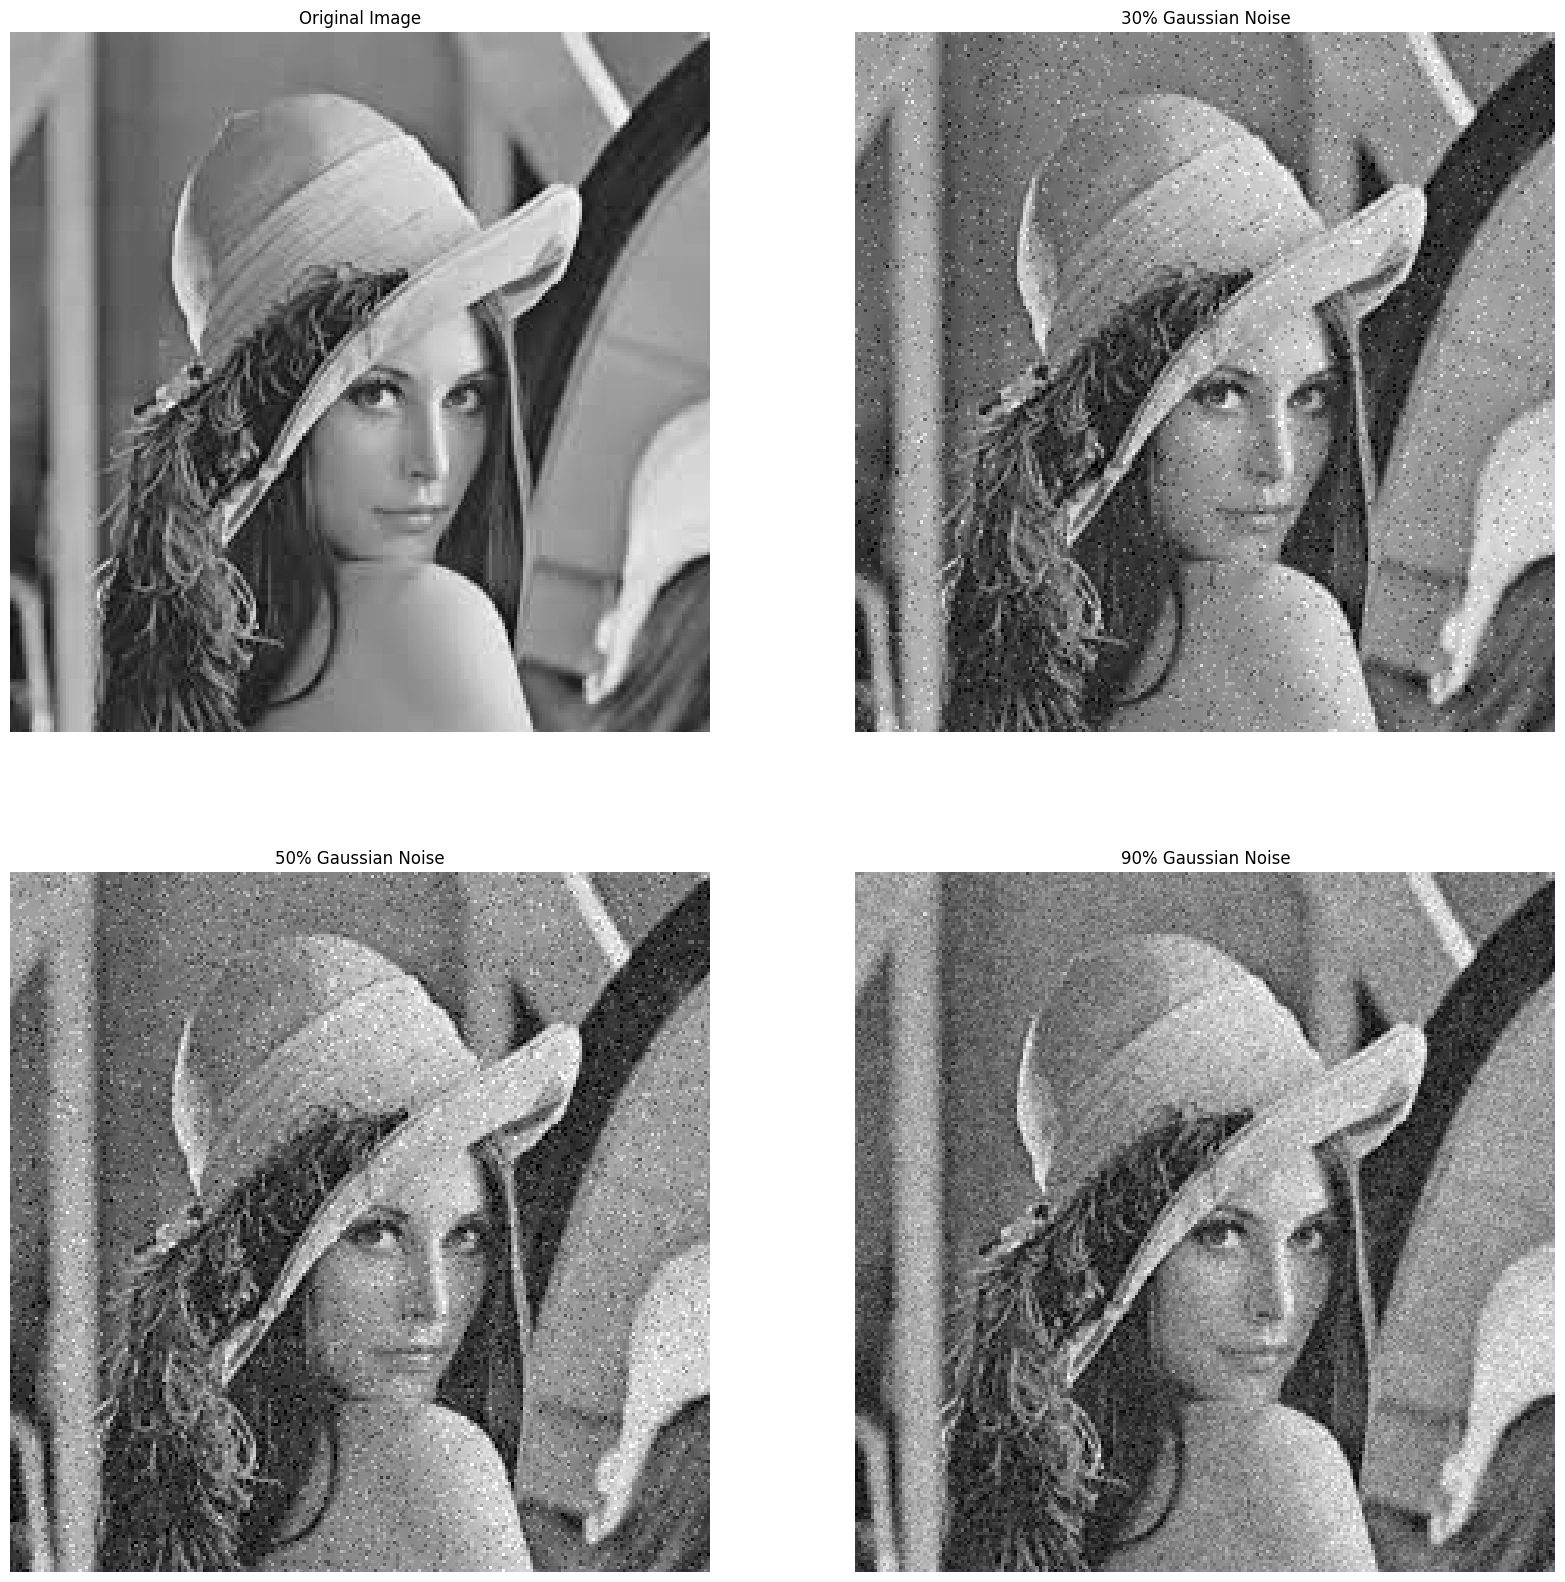

In [2]:
import cv2
import matplotlib.pyplot as plt

# 加载图像
image = cv2.imread('/opt/images/lena.png', cv2.IMREAD_GRAYSCALE)

# 添加不同强度的高斯噪声
gass_30_img = add_gaussian_noise(image, sigma=25, ratio=0.3)  # 30%
gass_50_img = add_gaussian_noise(image, sigma=25, ratio=0.5)  # 50%
gass_90_img = add_gaussian_noise(image, sigma=15, ratio=0.9)  # 90%

# 显示原始和结果图像
plt.figure(figsize=[20, 20])
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(222)
plt.imshow(gass_30_img, cmap='gray')
plt.title("30% Gaussian Noise")
plt.axis('off')

plt.subplot(223)
plt.imshow(gass_50_img, cmap='gray')
plt.title("50% Gaussian Noise")
plt.axis('off')

plt.subplot(224)
plt.imshow(gass_90_img, cmap='gray')
plt.title("90% Gaussian Noise")
plt.axis('off')

plt.show()